<a href="https://colab.research.google.com/github/Shunnsuke-cloud/Shun/blob/main/PythonKadai.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Saving ecommerce_product_clustering.csv to ecommerce_product_clustering.csv
最初の5行を確認
  product_id   price     category   brand  ratings       dimensions
0      P1000  124.84        Books  BrandC      4.1  10.04x3.32x4.85
1      P1001   93.09  Electronics  BrandC      4.3  18.61x8.78x3.74
2      P1002  132.38         Home  BrandE      5.0   4.99x5.82x6.13
3      P1003  176.15         Toys  BrandC      3.2   13.18x8.4x5.98
4      P1004   88.29         Home  BrandC      4.8   9.48x7.05x6.46

クラスタリング結果（最初の5行）
  product_id   price     category   brand  ratings       dimensions  Cluster
0      P1000  124.84        Books  BrandC      4.1  10.04x3.32x4.85        0
1      P1001   93.09  Electronics  BrandC      4.3  18.61x8.78x3.74        0
2      P1002  132.38         Home  BrandE      5.0   4.99x5.82x6.13        0
3      P1003  176.15         Toys  BrandC      3.2   13.18x8.4x5.98        2
4      P1004   88.29         Home  BrandC      4.8   9.48x7.05x6.46        0


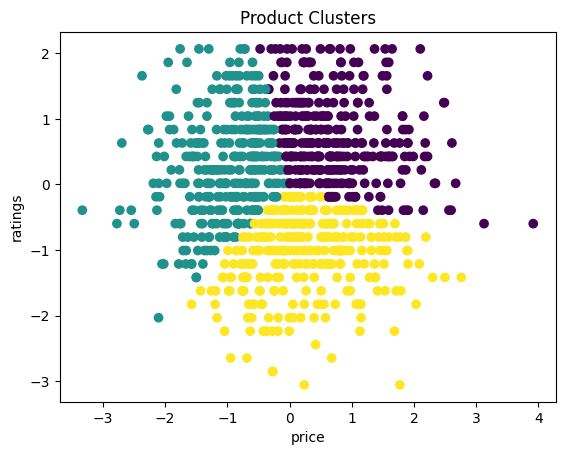

In [2]:

import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from google.colab import files


uploaded = files.upload()

file_name = list(uploaded.keys())[0]

df = pd.read_csv(file_name)

print("最初の5行を確認")
print(df.head())

numeric_cols = df.select_dtypes(include=['float64', 'int64']).columns
X = df[numeric_cols]

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

kmeans = KMeans(n_clusters=3, random_state=42)
clusters = kmeans.fit_predict(X_scaled)

df['Cluster'] = clusters

print("\nクラスタリング結果（最初の5行）")
print(df.head())

if X_scaled.shape[1] >= 2:
    plt.scatter(X_scaled[:, 0], X_scaled[:, 1], c=clusters, cmap='viridis')
    plt.xlabel(numeric_cols[0])
    plt.ylabel(numeric_cols[1])
    plt.title('Product Clusters')
    plt.show()
